# Web Scraping

Install needed python and linux libraries

In [21]:
!pip install selenium
!apt-get update
!apt-get install -y firefox
!wget https://github.com/mozilla/geckodriver/releases/download/v0.30.0/geckodriver-v0.30.0-linux64.tar.gz
!tar -xvzf geckodriver-v0.30.0-linux64.tar.gz
!chmod +x geckodriver
!mv geckodriver /usr/local/bin/
#!apt-get install chromium-driver # in case you want to use chrome

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

Load needed libraries to use Firefox webdriver through selenium in python

In [33]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException, NoSuchElementException, WebDriverException

In [30]:
options = Options()
options.headless = True

def web_driver():
    options = webdriver.FirefoxOptions()
    options = Options()
    options.headless = True
    options.add_argument("--verbose") # enable feedback as text from the driver
    # allow the browser to run without a sandbox,
      # a security feature to isolate the browser from the system, needed in Colab to run the browser in headless mode
    options.add_argument('--no-sandbox')
    # headless: a browser window is not displayed
    options.add_argument('--headless')
    # running in CPU helps improving performance in headless mode
    options.add_argument('--disable-gpu')
    # seting a fixed window size, even if headless, ensures correct rendering
    options.add_argument("--window-size=1920, 1920")
    # disables the use of a temporary file system for storing data
    options.add_argument('--disable-dev-shm-usage')
    # activate defined options
    driver = webdriver.Firefox(options=options)
    return driver

In [31]:
# Step 1: Initialize the WebDriver
driver = web_driver()

In [47]:
# Step 2: Open the website
driver.get('https://app2.ge.ch/ecohrcinternet/')


# Extra step - get the source code to see what you could obtain without selenium
source = driver.page_source

# Step 3: Perform the search
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'searchFormLabel')))
driver.find_element(By.ID, "searchFormLabel").send_keys("foundation")
driver.find_element(By.CSS_SELECTOR, ".hrc-search-search-icon").click()


In [48]:
# Step 4: Click to open the first row to display details
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, ".custom-table-responsive:nth-child(1) .row:nth-child(1) > .element:nth-child(2)")))
driver.find_element(By.CSS_SELECTOR, ".custom-table-responsive:nth-child(1) .row:nth-child(1) > .element:nth-child(2)").click()


In [57]:
# Step 5: Extract the 'name' and 'mission' from first table row
name = driver.find_element(By.CSS_SELECTOR, ".title-part > div:nth-child(1)").text
mission = driver.find_element(By.CSS_SELECTOR, "textarea.ng-pristine").text

In [55]:
# check that what retrieved is correct
print(name)

Abdullah Al-Awadi Foundation Geneva, in liquidation


In [52]:
# structure the contents in a table and save it
import pandas as pd
df = pd.DataFrame({'Name': [name], 'Mission': [mission]})
df.to_csv('df.csv', index=False)

from google.colab import files
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# Advanced - Step 6: Navigate the paginator
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR,
                                                                "mat-paginator.mat-paginator:nth-child(2) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > button:nth-child(4) > span:nth-child(1) > svg:nth-child(1)")))
driver.find_element(By.CSS_SELECTOR,
                    "mat-paginator.mat-paginator:nth-child(2) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > button:nth-child(4) > span:nth-child(1) > svg:nth-child(1)").click()


In [29]:
# Save and download a file with the page source code to see what you would get without selenium
from google.colab import files
with open("page_source_firefox.html", "w", encoding="utf-8") as file:
    file.write(source)
files.download('page_source_firefox.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
driver.quit()

# Extra materials - webscraping

In [12]:
from selenium import webdriver

In [13]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose") # enable feedback as text from the driver
    # allow the browser to run without a sandbox,
      # a security feature to isolate the browser from the system, needed in Colab to run the browser in headless mode
    options.add_argument('--no-sandbox')
    # headless: a browser window is not displayed
    options.add_argument('--headless')
    # running in CPU helps improving performance in headless mode
    options.add_argument('--disable-gpu')
    # seting a fixed window size, even if headless, ensures correct rendering
    options.add_argument("--window-size=1920, 1200")
    # disables the use of a temporary file system for storing data
    options.add_argument('--disable-dev-shm-usage')
    # activate defined options
    driver = webdriver.Chrome(options=options)
    return driver

# LLM embeddings

In [5]:
!pip uninstall -y pyarrow
!pip install pyarrow==14.0.1
!pip install -U FlagEmbedding
!pip install peft

Found existing installation: pyarrow 14.0.2
Uninstalling pyarrow-14.0.2:
  Successfully uninstalled pyarrow-14.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.1 MB/s eta 0:00:00
  Created wheel for FlagEmbedding: filename=FlagEmbedding-1.2.11-py3-none-any.whl size=171153 sha256=7478615cf6408c59edb9ffbcc4cb79698ed106483edfbc9c26531ae77bb6a100
  Stored in directory: /root/.cache

In [6]:
# https://github.com/FlagOpen/FlagEmbedding
# https://github.com/FlagOpen/FlagEmbedding/tree/master/FlagEmbedding/llm_embedder/docs
# https://arxiv.org/pdf/2310.07554v2
from FlagEmbedding import LLMEmbedder
model = LLMEmbedder('BAAI/llm-embedder',use_fp16=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/731 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [9]:
import pandas as pd
# get data from github repository https://github.com/gomez-L/tutorial_webscrap_LLMs
missions_200 = pd.read_csv('https://raw.githubusercontent.com/gomez-L/tutorial_webscrap_LLMs/main/missions_200.csv')

In [11]:
missions_200.head()

name  \
0                     \nSGO-Stiftung in Liquidation    
1          \nGretel und Walter Picard-Weil Stiftung    
2                          \nDr. B.K. Bose Stiftung    
3  \nARCHICULTURA, Stiftung fur Orts- und Landsch...   
4  \nRomisch-katholische Sigristenpfrundstiftung ...   

                                             mission  
0  \nPromotion of organizational sciences and the...  
1  Fulfillment of charitable and cultural tasks; ...  
2  \nMediation and promotion of classical homeopa...  
3  \nStanding up for intact, harmonious, traditio...  
4  \nThe purpose of the foundation is to enable t...

In [ ]:
# optional cleaning
  # remove numbers for example
#missions_200['mission'] = missions_200['mission'].str.replace(r'\d+', '', regex=True)

In [2]:
# obtain the embeddings of the missions, will be a 2D array, type numpy
#embeddings = model.encode_queries(missions_200['mission'].tolist(),task='qa')
# or get them directly from github
from numpy import genfromtxt
embeddings = genfromtxt('https://raw.githubusercontent.com/gomez-L/tutorial_webscrap_LLMs/main/embeddings.csv', delimiter=',')


In [18]:
print(embeddings[:5, :5])

[[ 0.01569149 -0.00825262 -0.00838382  0.0045124   0.05206549]
 [ 0.03154746  0.00527856  0.00078631 -0.02099331  0.01370305]
 [ 0.01093599 -0.010232    0.00186495 -0.04417396  0.02171455]
 [ 0.02797167  0.00924419 -0.02617029 -0.04970408  0.03707581]
 [ 0.00878257 -0.04068562  0.03925116 -0.01146644  0.02889891]]


In [3]:
embeddings.shape

(200, 768)

In [19]:
# save embeddings numpy array as csv and download it for later use
import numpy as np
np.savetxt("embeddings.csv", embeddings, delimiter=",")
from google.colab import files
files.download("embeddings.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Query the Dataset

```
# This is formatted as code
```



In [ ]:
!pip install transformers

In [20]:
from transformers import pipeline
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [34]:
# Retrieve the most relevant passage
question = model.encode_queries(['catholic'], task='qa')
# Compute cosine similarity between the question and the text embeddings
similarities = cosine_similarity(question, embeddings).flatten()
# Get the index of the most relevant text
most_relevant_idx = np.argmax(similarities)
relevant_text = missions_200['mission'].iloc[most_relevant_idx]

# Use the QA model to get an answer based on the relevant text
#qa_pipeline = pipeline("question-answering")
#result = qa_pipeline({
#    'context': relevant_text,
#    'question': question
#    })

print(relevant_text)


To enable the Roman Catholic Church to exercise worship and pastoral care in the area of the municipality of Muhlehorn and the Kerenzerberg, as well as to enable the residents of this area to fulfill their ecclesiastical and religious duties.



# Unsupervised Learning

In [37]:
!pip install umap-learn
import umap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.9 MB/s eta 0:00:00


In [38]:
# Initialize the UMAP model
reducer = umap.UMAP(n_components=2,n_neighbors=15,min_dist=0.1)
# Fit UMAP to the array and transform it
dimred = reducer.fit_transform(embeddings)

In [28]:
print(dimred.shape)

(200, 2)


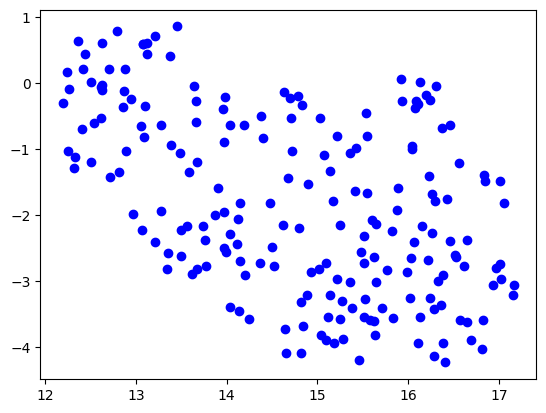

In [39]:
import matplotlib.pyplot as plt
plt.scatter(dimred[:, 0], dimred[:, 1], c='blue')
plt.show()

In [36]:
# UMAP dimensionality reduction is a graph
# Therefore, the most advanced clustering methods can be used

# Apply Louvain clustering to LLM-UMAP embeddings
!pip install scikit-learn python-louvain

In [40]:
from sklearn.neighbors import kneighbors_graph
import community.community_louvain as community_louvain
import networkx as nx

# Step 1: Create a nearest neighbors graph from UMAP embeddings
# Using 10 neighbors for the graph
knn_graph = kneighbors_graph(dimred, n_neighbors=50, mode='connectivity', include_self=False)

# Convert the nearest neighbors graph to a NetworkX graph
graph = nx.Graph(knn_graph)

# Step 2: Apply Louvain clustering
# This will return a dictionary where the key is the node (data point index) and the value is the community (cluster)
partition = community_louvain.best_partition(graph)

# Step 3: Extract cluster labels
labels = np.array([partition[i] for i in range(len(dimred))])


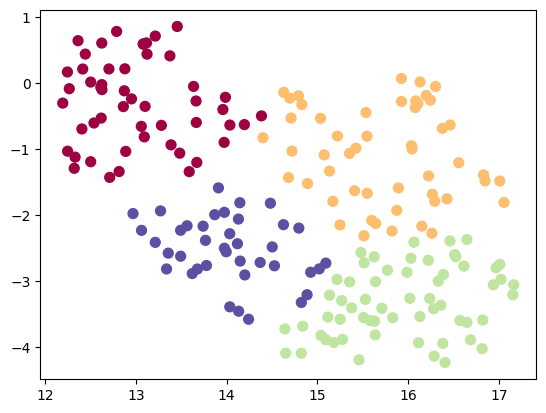

In [41]:
# visualize the clusters
plt.scatter(dimred[:, 0], dimred[:, 1], c=labels, cmap='Spectral', s=50)
plt.show()

In [42]:
# annotate missions_200 with cluster labels
missions_200['cluster'] = labels

# Explainable AI

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import data_table

In [47]:
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,1))
tfidf = vectorizer.fit_transform(missions_200['mission'])
tfidf = pd.DataFrame(tfidf.toarray(),columns=vectorizer.get_feature_names_out())
#tfidf.transpose().head()
data_table.DataTable(tfidf.transpose())

In [48]:
# Discover what the clusters mean

# Step 1: Add the cluster labels as a column to the DataFrame
tfidf['cluster'] = labels

# Step 2: Group by cluster and calculate the mean TF-IDF scores for each word on each cluster
tfidf_cluster_mean = tfidf.groupby('cluster').mean()

data_table.DataTable(tfidf_cluster_mean.transpose())
